pandas를 통해 데이터셋을 더하는 방법 중 2가지

# Concat (Concatenate)

* "+" 연산자를 이용해 2개의 문자열을 붙일 수 있다.

## string +
다른 방법으로 문자열을 더할 수 있다.
* tostring
* join

문자열을 나누는 방법
* split

## data.frame
data.frame도 마찬가지로 열이나 행을 기준으로 더할 수 있음

<br>

## using python

In [1]:
import pandas as pd

In [2]:
x = pd.DataFrame([['AX','AY'],['BX','BY']], index = ['A','B'], columns = ['X','Y'])
y = pd.DataFrame([['AX','AZ'],['CX','CZ']], index = ['A','C'], columns = ['X','Z'])

x

,X,Y
A,AX,AY
B,BX,BY


In [3]:
y

,X,Z
A,AX,AZ
C,CX,CZ


In [4]:
pd.concat([x, y]) ## concate_by_row 

,X,Y,Z
A,AX,AY,NaN
B,BX,BY,NaN
A,AX,NaN,AZ
C,CX,NaN,CZ


In [5]:
pd.concat([x, y], axis = 1) ## concate_by_column

,X,Y,X,Z
A,AX,AY,AX,AZ
B,BX,BY,NaN,NaN
C,NaN,NaN,CX,CZ


데이터프레임을 더할 때, 일반적으로는 더해지는 행, 열의 이름이나 인덱스 값이 일치해야 한다.

만약 그렇지 않은 경우, 비어있는 부분에 대해서는 NaN 값으로 채워지게 된다.

# Stock
주식 데이터로 concat를 연습

In [6]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv')
df1.head()

,Unnamed: 0,2019/09\n(IFRS연결),2019/12\n(IFRS연결),2020/03\n(IFRS연결),2020/06\n(IFRS연결),2020/09\n(IFRS연결)
0,매출액,"5,291","5,586","5,339","5,816","6,243"
1,영업이익,492,327,561,541,644
2,영업이익(발표기준),492,327,561,541,644
3,세전계속사업이익,348,39,450,487,465
4,당기순이익,258,-252,334,349,322


In [7]:
df1 = pd.read_csv(urlhead + '000080.csv').transpose()
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005",...,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332",...,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204",...,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613",...,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"


위의 문제를 해결하기 위한 방법은?

>> pandas first row header
https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row


```
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header
```


In [8]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df

In [9]:
df1 = mydf('000080.csv')
df1

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005",...,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332",...,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204",...,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613",...,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897",...,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [10]:
df2 = mydf('000890.csv')
df3 = mydf('005300.csv')
df4 = mydf('027740.csv')
df5 = mydf('035810.csv')
df6 = mydf('136480.csv')

In [11]:
df = pd.concat([df1, df2, df3, df4, df5, df6])
df.shape

(30, 33)

필요한 것은 마지막 분기의 데이터이다.

이를 위해서 mydf를 수정해야 함

In [12]:
df3 = mydf('000080.csv')

In [13]:
df3.drop(df3.columns[0], axis=1)

Unnamed: 0,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),492,492,348,258,259,0,"34,061","23,056","11,005","10,998",...,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",...,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),561,561,450,334,334,0,"36,368","26,164","10,204","10,198",...,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),541,541,487,349,349,0,"43,007","32,393","10,613","10,608",...,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),644,644,465,322,323,0,"39,617","28,720","10,897","10,893",...,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [14]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])
df = df.reset_index()
df = df.drop(df.columns[0], axis=1)
    
df

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897",...,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,205,6,6,5,4,4,NaN,"1,555",739,816,...,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096",...,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,...,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534",...,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695",...,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


In [15]:
# "테마" 라는 추가 정보를 더함

df2 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)
df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [16]:
pd.concat([df2, df], axis = 1)

,종목,종목명,테마,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,000080,하이트진로,주류,"6,243",644,644,465,322,323,0,...,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,000890,보해양조,주류,205,6,6,5,4,4,NaN,...,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,005300,롯데칠성,주류,"5,980",293,293,194,155,147,7,...,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,027740,마니커,육계,521,-89,-89,-104,-104,-104,0,...,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,035810,이지홀딩스,육계,"4,108",246,246,816,657,659,-1,...,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,136480,하림,육계,"2,613",1,1,17,66,66,0,...,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"
6,136490,선진,돼지고기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df2 = df2.drop(6)
df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계


In [18]:
df = pd.concat([df2, df], axis = 1)
df

,종목,종목명,테마,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,000080,하이트진로,주류,"6,243",644,644,465,322,323,0,...,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,000890,보해양조,주류,205,6,6,5,4,4,NaN,...,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,005300,롯데칠성,주류,"5,980",293,293,194,155,147,7,...,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,027740,마니커,육계,521,-89,-89,-104,-104,-104,0,...,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,035810,이지홀딩스,육계,"4,108",246,246,816,657,659,-1,...,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,136480,하림,육계,"2,613",1,1,17,66,66,0,...,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


In [19]:
# reset_index 이후 작업, column order 전처리등을 위해 데이터의 부분만을 선택


df[['종목', '매출액', '순이익률']]

,종목,매출액,순이익률
0,000080,"6,243",5.17
1,000890,205,2.15
2,005300,"5,980",2.59
3,027740,521,-19.95
4,035810,"4,108",16.00
5,136480,"2,613",2.51


In [20]:
df = df[['종목', '매출액', '순이익률']]
df

,종목,매출액,순이익률
0,000080,"6,243",5.17
1,000890,205,2.15
2,005300,"5,980",2.59
3,027740,521,-19.95
4,035810,"4,108",16.00
5,136480,"2,613",2.51


# Merge 와 Concat

merge는 concat와 다르게 공통된 부분을 기반으로 합치기가 주요 용도

특정 기준 컬럼을 기준으로 합쳐야 하는데 그냥 concat를 하면, 

In [21]:
df2 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)
df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [22]:
pd.concat([df, df2], axis = 1)

,종목,매출액,순이익률,종목,종목명,테마
0,000080,"6,243",5.17,000080,하이트진로,주류
1,000890,205,2.15,000890,보해양조,주류
2,005300,"5,980",2.59,005300,롯데칠성,주류
3,027740,521,-19.95,027740,마니커,육계
4,035810,"4,108",16.00,035810,이지홀딩스,육계
5,136480,"2,613",2.51,136480,하림,육계
6,NaN,NaN,NaN,136490,선진,돼지고기


종목이라는 column은 중복되어 처리가 되어 있으며, 데이터가 비어있는 부분 (선진)도 있음

merge의 사용법: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html 

df.merge("붙일 내용", how = "(방법)", on ="(기준 feature)")

In [23]:
df = df.merge(df2, how = 'inner', on = '종목')
df

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
3,027740,521,-19.95,마니커,육계
4,035810,"4,108",16.00,이지홀딩스,육계
5,136480,"2,613",2.51,하림,육계


# Conditioning (조건문)

1. 주식 종목들의 평균 순이익률은 얼마일까
2. 단, 순이익률이 -인 종목은 제외하고 계산
3. 추가로 테마별로

을 구하려면,

순이익률 > 0 에 해당하는 부분을 선택해야 함

In [24]:
# type cast
df['순이익률'] = pd.to_numeric(df['순이익률'])

# 필터링 조건 (Condition) 설정
condition = (df['순이익률'] > 0) # Type Cast
# () 로 씌우는것에 주의

## condition 의 값을 출력을 통해 확인. 

# [ ] 안에 컨디션을 설정하는 것으로, 컨디션의 값이 *TRUE*로 해당하는 부분의 데이터만 선택 할 수 있다.
df_subset = df[condition]

# 결과물을 확인
df_subset

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
4,035810,"4,108",16.00,이지홀딩스,육계
5,136480,"2,613",2.51,하림,육계


* &(and) 와 |(or)를 사용하여 여러개의 condition을 동시에 조절 할 수 있다.

In [25]:
condition = ( (df['순이익률'] > 0) & (df['순이익률'] < 10))
df_subset2 = df[condition]

df_subset2

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
5,136480,"2,613",2.51,하림,육계


매번 변수 설정 필요 없이, 바로 사용 가능함

```
df_subset2 = df[( (df['순이익률'] > 0) & (df['순이익률'] < 10))]
```

## isin

숫자 값을 기준으로 사용하는 것이 아닌,
범주형 데이터를 기준으로 conditioning을 하려는 경우는 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

종목코드에 8이 들어간과 같은 conditioning은 어떻게 해야 하나

In [26]:
df_subset[df_subset['테마'].isin(['주류'])] 

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류


In [27]:
df[(df['테마'] == '주류')]

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류


# Groupby
1. 주식 종목들의 평균 순이익률은 얼마일까
2. 단, 순이익률이 -인 종목은 제외하고 계산
3. 추가로 테마별로

테마에 따라 평균을 구한다

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html를 참조

In [28]:
df_subset.groupby('테마').순이익률.mean()

테마
육계    9.255000
주류    3.303333
Name: 순이익률, dtype: float64

In [29]:
# df_subset.groupby('테마').mean()은 어떤 결과를 내며 그 이유는 무엇인가

df_subset.groupby('테마').mean()

,순이익률
테마,
육계,9.255000
주류,3.303333


In [30]:
def toInt(string):
    return int(string.replace(',',''))

df_subset['매출액'] = df_subset['매출액'].apply(toInt)
df_subset

<ipython-input-30-4bf597ff4375>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['매출액'] = df_subset['매출액'].apply(toInt)


,종목,매출액,순이익률,종목명,테마
0,000080,6243,5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,5980,2.59,롯데칠성,주류
4,035810,4108,16.00,이지홀딩스,육계
5,136480,2613,2.51,하림,육계


In [31]:
df_subset.groupby('테마').mean()

,매출액,순이익률
테마,,
육계,3360.500000,9.255000
주류,4142.666667,3.303333


# pandas styling

같은 데이터라면 보기 좋은 그림이 더 설득하기엔 좋다

아래와 같은 잡기술 은 몰라도 손해는 없지만, 알아두면 좋음

(참고) 다음은 github 에서는 작동하지 않음

구체적인 원리는 html/css에 대한 이해가 많이 필요하지만, 일단은 이런 방법도 있다 정도를 알아두시면 된다

In [32]:
def coloring_text(val):
  if val > 0:
    color = '#1e3799'
  else:
    color = '#eb2f06'
  return 'color: %s' % color

df[['순이익률']].style.applymap(coloring_text)

,순이익률
0,5.170000
1,2.150000
2,2.590000
3,-19.950000
4,16.000000
5,2.510000


In [33]:
df.style.set_table_styles(
    [
     {'selector': 'th','props': [('background', '#4000c7'), ('color', '#FFFFFF') ]},
     {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#ededed')]}, 
     {'selector': 'tr:nth-of-type(even)','props': [('background', '#FFFFFF')]},
     {'selector': 'tr:hover', 'props': [('background-color', '#00da75')]}
     ]
)

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.170000,하이트진로,주류
1,000890,205,2.150000,보해양조,주류
2,005300,"5,980",2.590000,롯데칠성,주류
3,027740,521,-19.950000,마니커,육계
4,035810,"4,108",16.000000,이지홀딩스,육계
5,136480,"2,613",2.510000,하림,육계


# Tidy 데이터

## 개요
데이터 형태 변환의 필요성

라이브러리에 따라서 다른 형태의 데이터를 필요로 한다.

예를 들어, 데이터시각화에 쓰이는 Seaborn 라이브러리는 "Tidy"한 데이터를 필요로 함 (항상 그런 것은 아님)

# Tidy Data 란?
X 와 Y, Z에게 A, B라는 약을 투여해서 반응을 알아본다

라는 상황을 가정

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['X', 'Y', 'Z'], 
    columns=['A', 'B'])

table1

,A,B
X,NaN,2
Y,16.0,11
Z,3.0,1


table1 은 가상의 실험에 대한 데이터를 야생에서 볼 수 있는 Wide 한 형태로 제공한다.

이는 long-form으로 불리기도 함.

테이블은 2개의 열과 3개의 행으로 구성되어 있으며 각각 라벨링 되어 있다.

동일한 데이터를 표현하는 방법으로 많은 방법 들이 있음.

가령, table2는 table1과 동일한 결과를 보여주지만, 행과 열이 전치 (transpose) 되어 있어 보이는 레이아웃이 다름.

In [35]:
table2 = table1.T # transpose
table2

,X,Y,Z
A,NaN,16.0,3.0
B,2.0,11.0,1.0


table2 은 table1을 값과 변수 그리고 관측을 더 명확하게 하기 위해서 다른 방식으로 재정리 한 것임.

table2 은 table1의 tidy 버전.

각 행은 하나의 관측을 의미하며, 한 사람에 대해서 작업물 (column)과 그 결과 값이 포함되어있음.

<br>
<br>

# .melt()와 .pivot_table()를 사용하여 tidy - wide 형태를 변환하기.

## wide --> tidy
pandas 의 melt 함수를 사용하여 table1을 tidy 형태로 바꿀 수 있다.

In [36]:
### 행의 인덱스를 선택하고, 이를 행으로 새로 추가
tidy1 = table1.reset_index() # rownames를 새로 설정 
tidy1

,index,A,B
0,X,NaN,2
1,Y,16.0,11
2,Z,3.0,1


* tidy 는 한 행에, 한 observation
* 한 observation에는 어떤 값들이 있어야 할까?
* 누가(id), 어떤 feature 값을 가지는지(value) * Column을 지정해주면 됨
* 이를 melt에 표현

In [37]:
### 각 행에 대해서 (unique identifier)를 확인
### 한개의 "tidy" 한 열에 대해서 포함되어야 할 (기준이 되는) 데이터를 선택
tidy1 = tidy1.melt(id_vars = 'index', value_vars = ['A', 'B'])
tidy1

,index,variable,value
0,X,A,NaN
1,Y,A,16.0
2,Z,A,3.0
3,X,B,2.0
4,Y,B,11.0
5,Z,B,1.0


In [38]:
# 열의 이름을 수정
tidy1 = tidy1.rename(
    columns = {
        'index': 'row', 
        'variable': 'column', 
        'value': 'value'
        }
)
tidy1

,row,column,value
0,X,A,NaN
1,Y,A,16.0
2,Z,A,3.0
3,X,B,2.0
4,Y,B,11.0
5,Z,B,1.0


## tidy --> wide
pivot_table 함수는 melt의 반대 역할을 하는 함수

In [39]:
# 파라미터에 대한 설명
# index: unique identifier
# columns: "wide" 데이터에서 column별로 다르게 하고자 하는 값.
# values: 결과값이 들어가는 곳 (wide 데이터프레임의 내용에 들어갈 값)
wide = tidy1.pivot_table(index = 'row', columns = 'column', values = 'value')
wide

column,A,B
row,,
X,NaN,2.0
Y,16.0,11.0
Z,3.0,1.0


## tidy 데이터의 목적
tidy 데이터는 Seaborn과 같은 시각화 라이브러리에서 유용하게 쓰일수 있다.

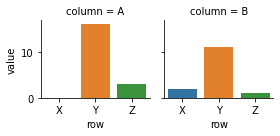

In [40]:
### Seaborn의 기능 중 한가지 예시
import seaborn as sns
sns.catplot(x = 'row', y = 'value', col = 'column', kind = 'bar', data = tidy1, height = 2);

# Exercise

# 1. Concat

6개의 데이터를 1개로 합쳐라. 단,
* 매출액
* 자산총계
* EPS
* 제일 최근 분기의 데이터

에 대해서만 수행

In [41]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [43]:
import pandas as pd
 
urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'

def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    df = df[['매출액', '자산총계', 'EPS(원)']]
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])
df = df.reset_index()
df = df.drop(df.columns[0], axis=1)
    
df

Unnamed: 0,매출액,자산총계,EPS(원)
0,"6,243","39,617",453
1,205,"1,555",3
2,"5,980","34,066","1,682"
3,521,"1,897",-61
4,"4,108","18,966","1,168"
5,"2,613","8,550",62


In [44]:
df2 = pd.DataFrame(
    {
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
    }
)
df2

,종목명
0,하이트진로
1,보해양조
2,롯데칠성
3,마니커
4,이지홀딩스
5,하림
6,선진


In [45]:
df = pd.concat([df, df2], axis = 1, join='inner')
df

,매출액,자산총계,EPS(원),종목명
0,"6,243","39,617",453,하이트진로
1,205,"1,555",3,보해양조
2,"5,980","34,066","1,682",롯데칠성
3,521,"1,897",-61,마니커
4,"4,108","18,966","1,168",이지홀딩스
5,"2,613","8,550",62,하림


In [46]:
df.index=['2020/09','2020/09','2020/09','2020/09','2020/09','2020/09']
df

,매출액,자산총계,EPS(원),종목명
2020/09,"6,243","39,617",453,하이트진로
2020/09,205,"1,555",3,보해양조
2020/09,"5,980","34,066","1,682",롯데칠성
2020/09,521,"1,897",-61,마니커
2020/09,"4,108","18,966","1,168",이지홀딩스
2020/09,"2,613","8,550",62,하림


In [47]:
df.shape

(6, 4)

# 2. Reshape
방금 만든 데이터를 tidy 형태로 변환하라

In [48]:
df_tidy = df.melt(id_vars= '종목명', value_vars=['매출액', '자산총계', 'EPS(원)'])
df_tidy

,종목명,variable,value
0,하이트진로,매출액,"6,243"
1,보해양조,매출액,205
2,롯데칠성,매출액,"5,980"
3,마니커,매출액,521
4,이지홀딩스,매출액,"4,108"
5,하림,매출액,"2,613"
6,하이트진로,자산총계,"39,617"
7,보해양조,자산총계,"1,555"
8,롯데칠성,자산총계,"34,066"
9,마니커,자산총계,"1,897"


In [49]:
df_tidy = df.melt(id_vars= '종목명', value_vars=['매출액', '자산총계', 'EPS(원)'])
df_tidy

,종목명,variable,value
0,하이트진로,매출액,"6,243"
1,보해양조,매출액,205
2,롯데칠성,매출액,"5,980"
3,마니커,매출액,521
4,이지홀딩스,매출액,"4,108"
5,하림,매출액,"2,613"
6,하이트진로,자산총계,"39,617"
7,보해양조,자산총계,"1,555"
8,롯데칠성,자산총계,"34,066"
9,마니커,자산총계,"1,897"


In [50]:
df_tidy = df_tidy.rename(
    columns = {
        'index': '종목명', 
        'variable': 'Feature', 
        'value': 'Value'
        }
)
df_tidy

,종목명,Feature,Value
0,하이트진로,매출액,"6,243"
1,보해양조,매출액,205
2,롯데칠성,매출액,"5,980"
3,마니커,매출액,521
4,이지홀딩스,매출액,"4,108"
5,하림,매출액,"2,613"
6,하이트진로,자산총계,"39,617"
7,보해양조,자산총계,"1,555"
8,롯데칠성,자산총계,"34,066"
9,마니커,자산총계,"1,897"


In [51]:
df_tidy.style.hide_index()

종목명,Feature,Value
하이트진로,매출액,"6,243"
보해양조,매출액,205
롯데칠성,매출액,"5,980"
마니커,매출액,521
이지홀딩스,매출액,"4,108"
하림,매출액,"2,613"
하이트진로,자산총계,"39,617"
보해양조,자산총계,"1,555"
롯데칠성,자산총계,"34,066"
마니커,자산총계,"1,897"


In [52]:
def toInt(string):
    return int(string.replace(',',''))

df_tidy['Value'] = df_tidy['Value'].apply(toInt)

df_tidy['Value'] = pd.to_numeric(df_tidy['Value'])

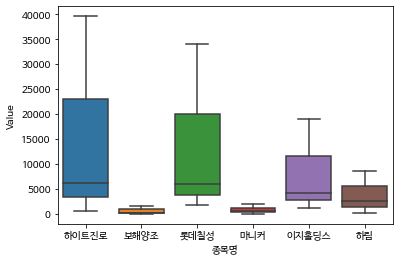

In [53]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
sns.boxplot(data = df_tidy, x = '종목명', y = 'Value');

In [54]:
df_tidy['종목명'].nunique()

6

# 3. Merge & Join +

In [55]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [56]:
df2 = pd.merge(left, right, how = 'left')
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


# 4. 

### 특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv 형태로 수집하고

* 최종 분기에 해당하는 데이터
* 테마별 평균 데이터를 결과물로 만드는 코드를 작성하라. 

단, 
* 매출액
* 자본총계
* EPS

에 대해서만 수행

In [57]:
# 예시
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

In [58]:
df1 =pd.DataFrame({
    '종목명' : ['팬오션', '흥아해운', 'HMM','KSS해운', '대한해운'],
    '매출액' : [24972, 899, 64133, 2262, 8841],
    '자본총계' : [46593, 3001, 93734, 10695, 33456],
    'EPS' : [326, 259, 1579, 1098, 316]
})

df2 =pd.DataFrame({
    '종목명' : ['에이아이비트', '애머릿지', '마이더스먀', '우리바이오', '오성첨단소재', '한국비엔씨', '에스엘바이오닉스'],
    '매출액' : [292, 742, 82, 16234, 796, 194, 286],
    '자본총계' : [581, 784, 454, 6461, 2572, 676, 648],
    'EPS' : [-321, -152, -93, 533, 42, -118, -266]
})

In [59]:
df1

,종목명,매출액,자본총계,EPS
0,팬오션,24972,46593,326
1,흥아해운,899,3001,259
2,HMM,64133,93734,1579
3,KSS해운,2262,10695,1098
4,대한해운,8841,33456,316


In [60]:
df1['테마'] = '해운'
df2['테마'] = '마리화나(대마)'
df1

,종목명,매출액,자본총계,EPS,테마
0,팬오션,24972,46593,326,해운
1,흥아해운,899,3001,259,해운
2,HMM,64133,93734,1579,해운
3,KSS해운,2262,10695,1098,해운
4,대한해운,8841,33456,316,해운


In [61]:
dataf = pd.concat([df1, df2])
dataf

,종목명,매출액,자본총계,EPS,테마
0,팬오션,24972,46593,326,해운
1,흥아해운,899,3001,259,해운
2,HMM,64133,93734,1579,해운
3,KSS해운,2262,10695,1098,해운
4,대한해운,8841,33456,316,해운
0,에이아이비트,292,581,-321,마리화나(대마)
1,애머릿지,742,784,-152,마리화나(대마)
2,마이더스먀,82,454,-93,마리화나(대마)
3,우리바이오,16234,6461,533,마리화나(대마)
4,오성첨단소재,796,2572,42,마리화나(대마)


In [62]:
dataf2 = dataf.groupby('테마', as_index=True).mean()
dataf2

,매출액,자본총계,EPS
테마,,,
마리화나(대마),2660.857143,1739.428571,-53.571429
해운,20221.400000,37495.800000,715.600000


In [63]:
dataf2['테마'] = dataf2.index

In [64]:
type(dataf2)

pandas.core.frame.DataFrame

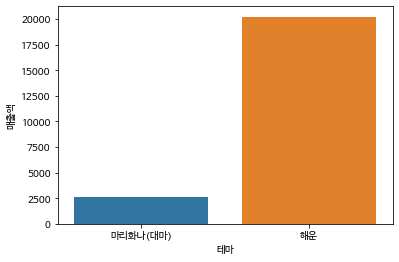

In [65]:
sns.barplot(x = '테마', y = '매출액', data = dataf2);

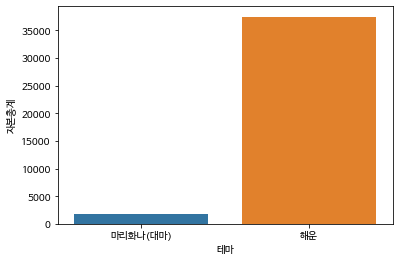

In [66]:
sns.barplot(x = '테마', y = '자본총계', data = dataf2);

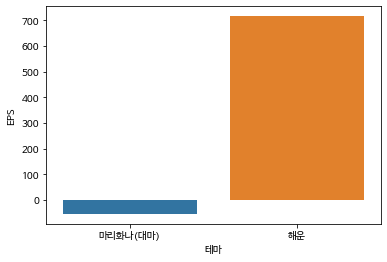

In [67]:
sns.barplot(x = '테마', y = 'EPS', data = dataf2);